# Automobile Dataset

Этот набор данных состоит из данных из автомобильного ежегодника Уорда за 1985 год.

Описание содержимого датасета:

normalized-losses: Страховой риск

make: Марка авто

fuel-type: Тип топлива

aspiration: Тип двигателя 

num-of-doors: Кол-во дверей

body-style: Тип кузова

drive-wheels: Тип привода

engine-location: Расположение двигателя

engine-size: Объем двигателя

horsepower: Лошадиные силы

price: Стоимость автомобиля

### Подключение необходимых библиотек

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib.ticker import MultipleLocator, FixedLocator
from IPython.display import display, HTML

Считывание данных и демонстрация первых 5-ти записей

In [3]:
path = "/home/dima/Myproject/DSIS_summer/archive"
data = pd.read_csv('/home/dima/Myproject/DSIS_summer/archive/Automobile_data.csv')
filenames = glob.glob(path + "/*.csv")
dfs = []
for _ in filenames:
    dfs.append(pd.read_csv(_))
data = pd.concat(dfs, ignore_index=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Диаграмма, демонстрирующая процентное соотношение автомобильных компаний

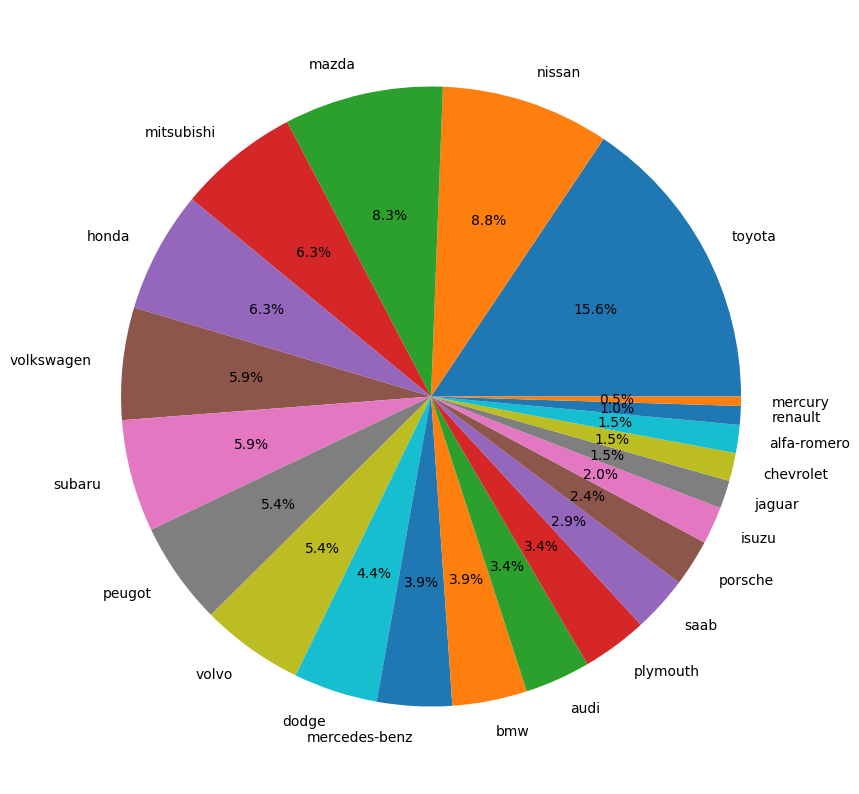

In [4]:
fig, ax = plt.subplots(figsize=(10,12))
df1 = pd.DataFrame(data['make'].value_counts().reset_index())
plt.pie(data=df1,x=df1['count'],labels=df1['make'], autopct='%.1f%%')
plt.show()


По данной диаграмме можно сказать, что большую чать рынка на 1985 год занимают автопроизводители Японии (Toyota: 15,6%, Nissan: 8,8%, Mazda: 8,3% и т.д.)

### Диаграмма демонстрирующая количественную разницу между машинами на газу и дизеле 

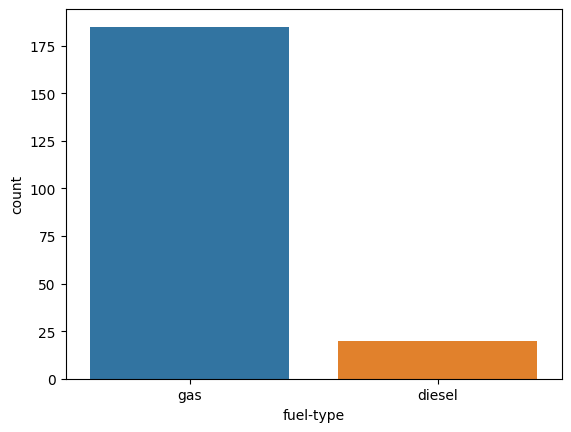

In [5]:
graph1 = sns.countplot(x='fuel-type', data=data)

По данной диаграмме можно сказать, что большая часть автомобилей на 1985 год, создавались с газовыми двигателями

### Диаграмма демонстрирующая количественную разницу между разными видами кузова автомобилей

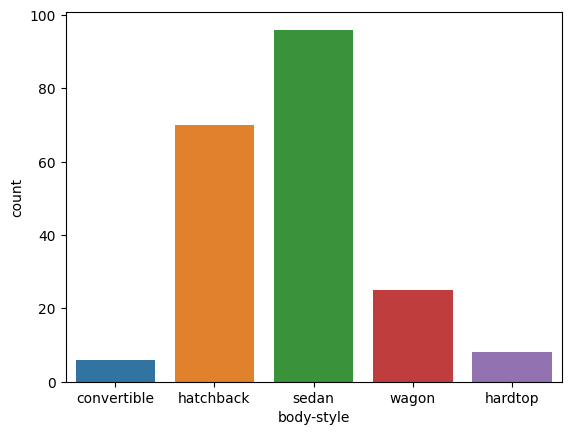

In [6]:
graph1 = sns.countplot(x='body-style', data=data)

### Диаграмма демонструрующая зависимость объема двигателя к лошадиным силам

Text(0, 0.5, 'Объем двигателя (см³)')

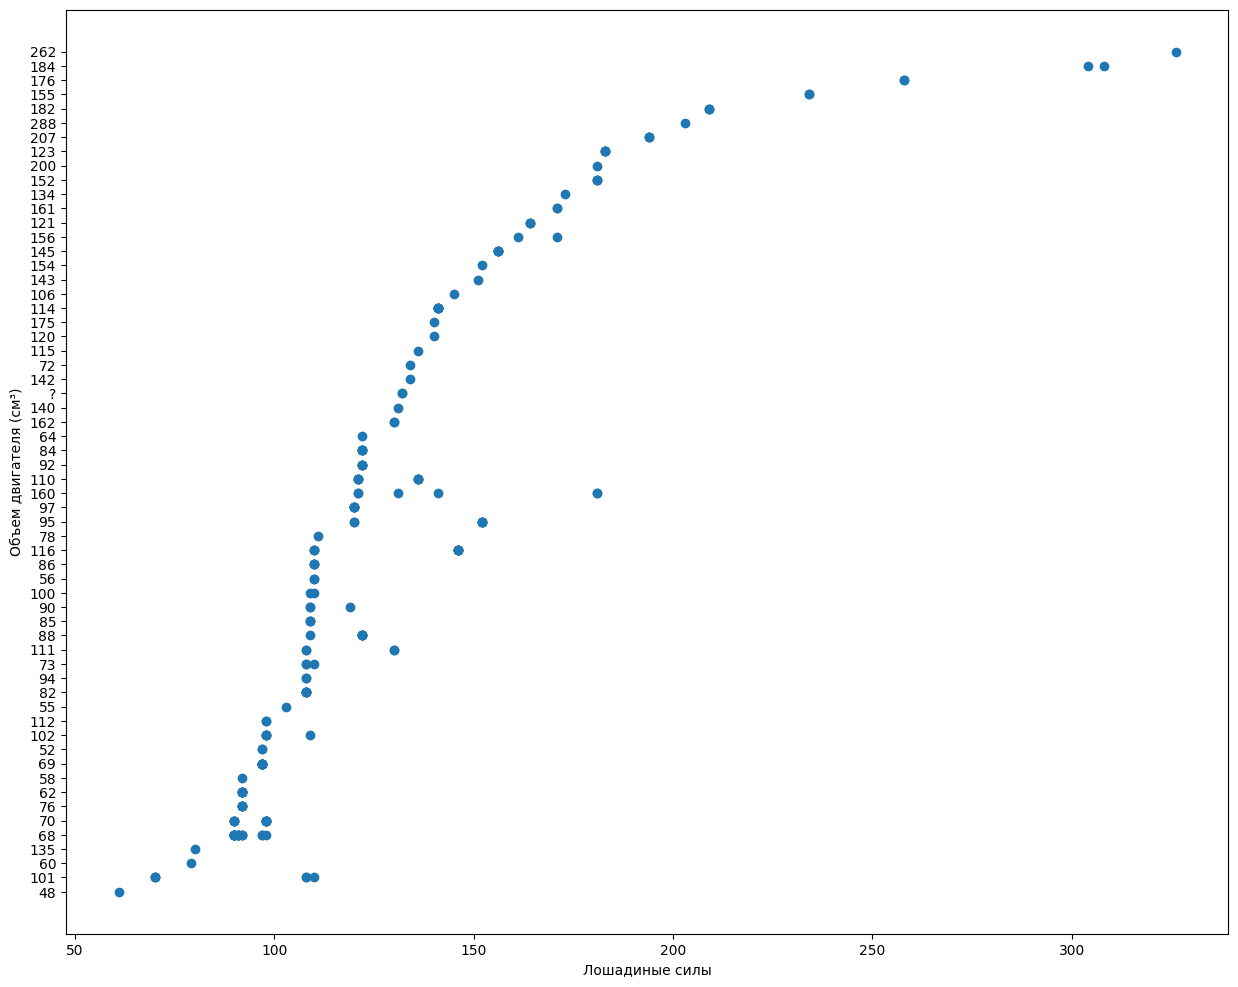

In [203]:
fig, ax = plt.subplots(figsize=(15,12))
data['engine-size'] = data['engine-size'].astype (int)
df = data.sort_values('engine-size', ascending = True).reset_index(drop=False)

fig = plt.scatter(df['engine-size'], df['horsepower'])

ax.set_xlabel("Лошадиные силы")
ax.set_ylabel("Объем двигателя (см³)")

По данной диагармме можно сказать, что мощность автомобиля растет не пропорционально объему двигателя

### Стоимость автомобилей

In [39]:
dict = {'Марка':[],
        'Стоимость':[]
       }
  
df_price = pd.DataFrame(dict)
for i in range(len(data)):
    make = data['make'].loc[data.index[i]]
    price = data['price'].loc[data.index[i]]
    if price != '?':
        df2 = {'Марка': make, 'Стоимость': int(price)}
        df_price = pd.concat([df_price, pd.DataFrame([df2])], ignore_index=True)
display(df_price)

,Марка,Стоимость
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
196,volvo,16845.0
197,volvo,19045.0
198,volvo,21485.0
199,volvo,22470.0


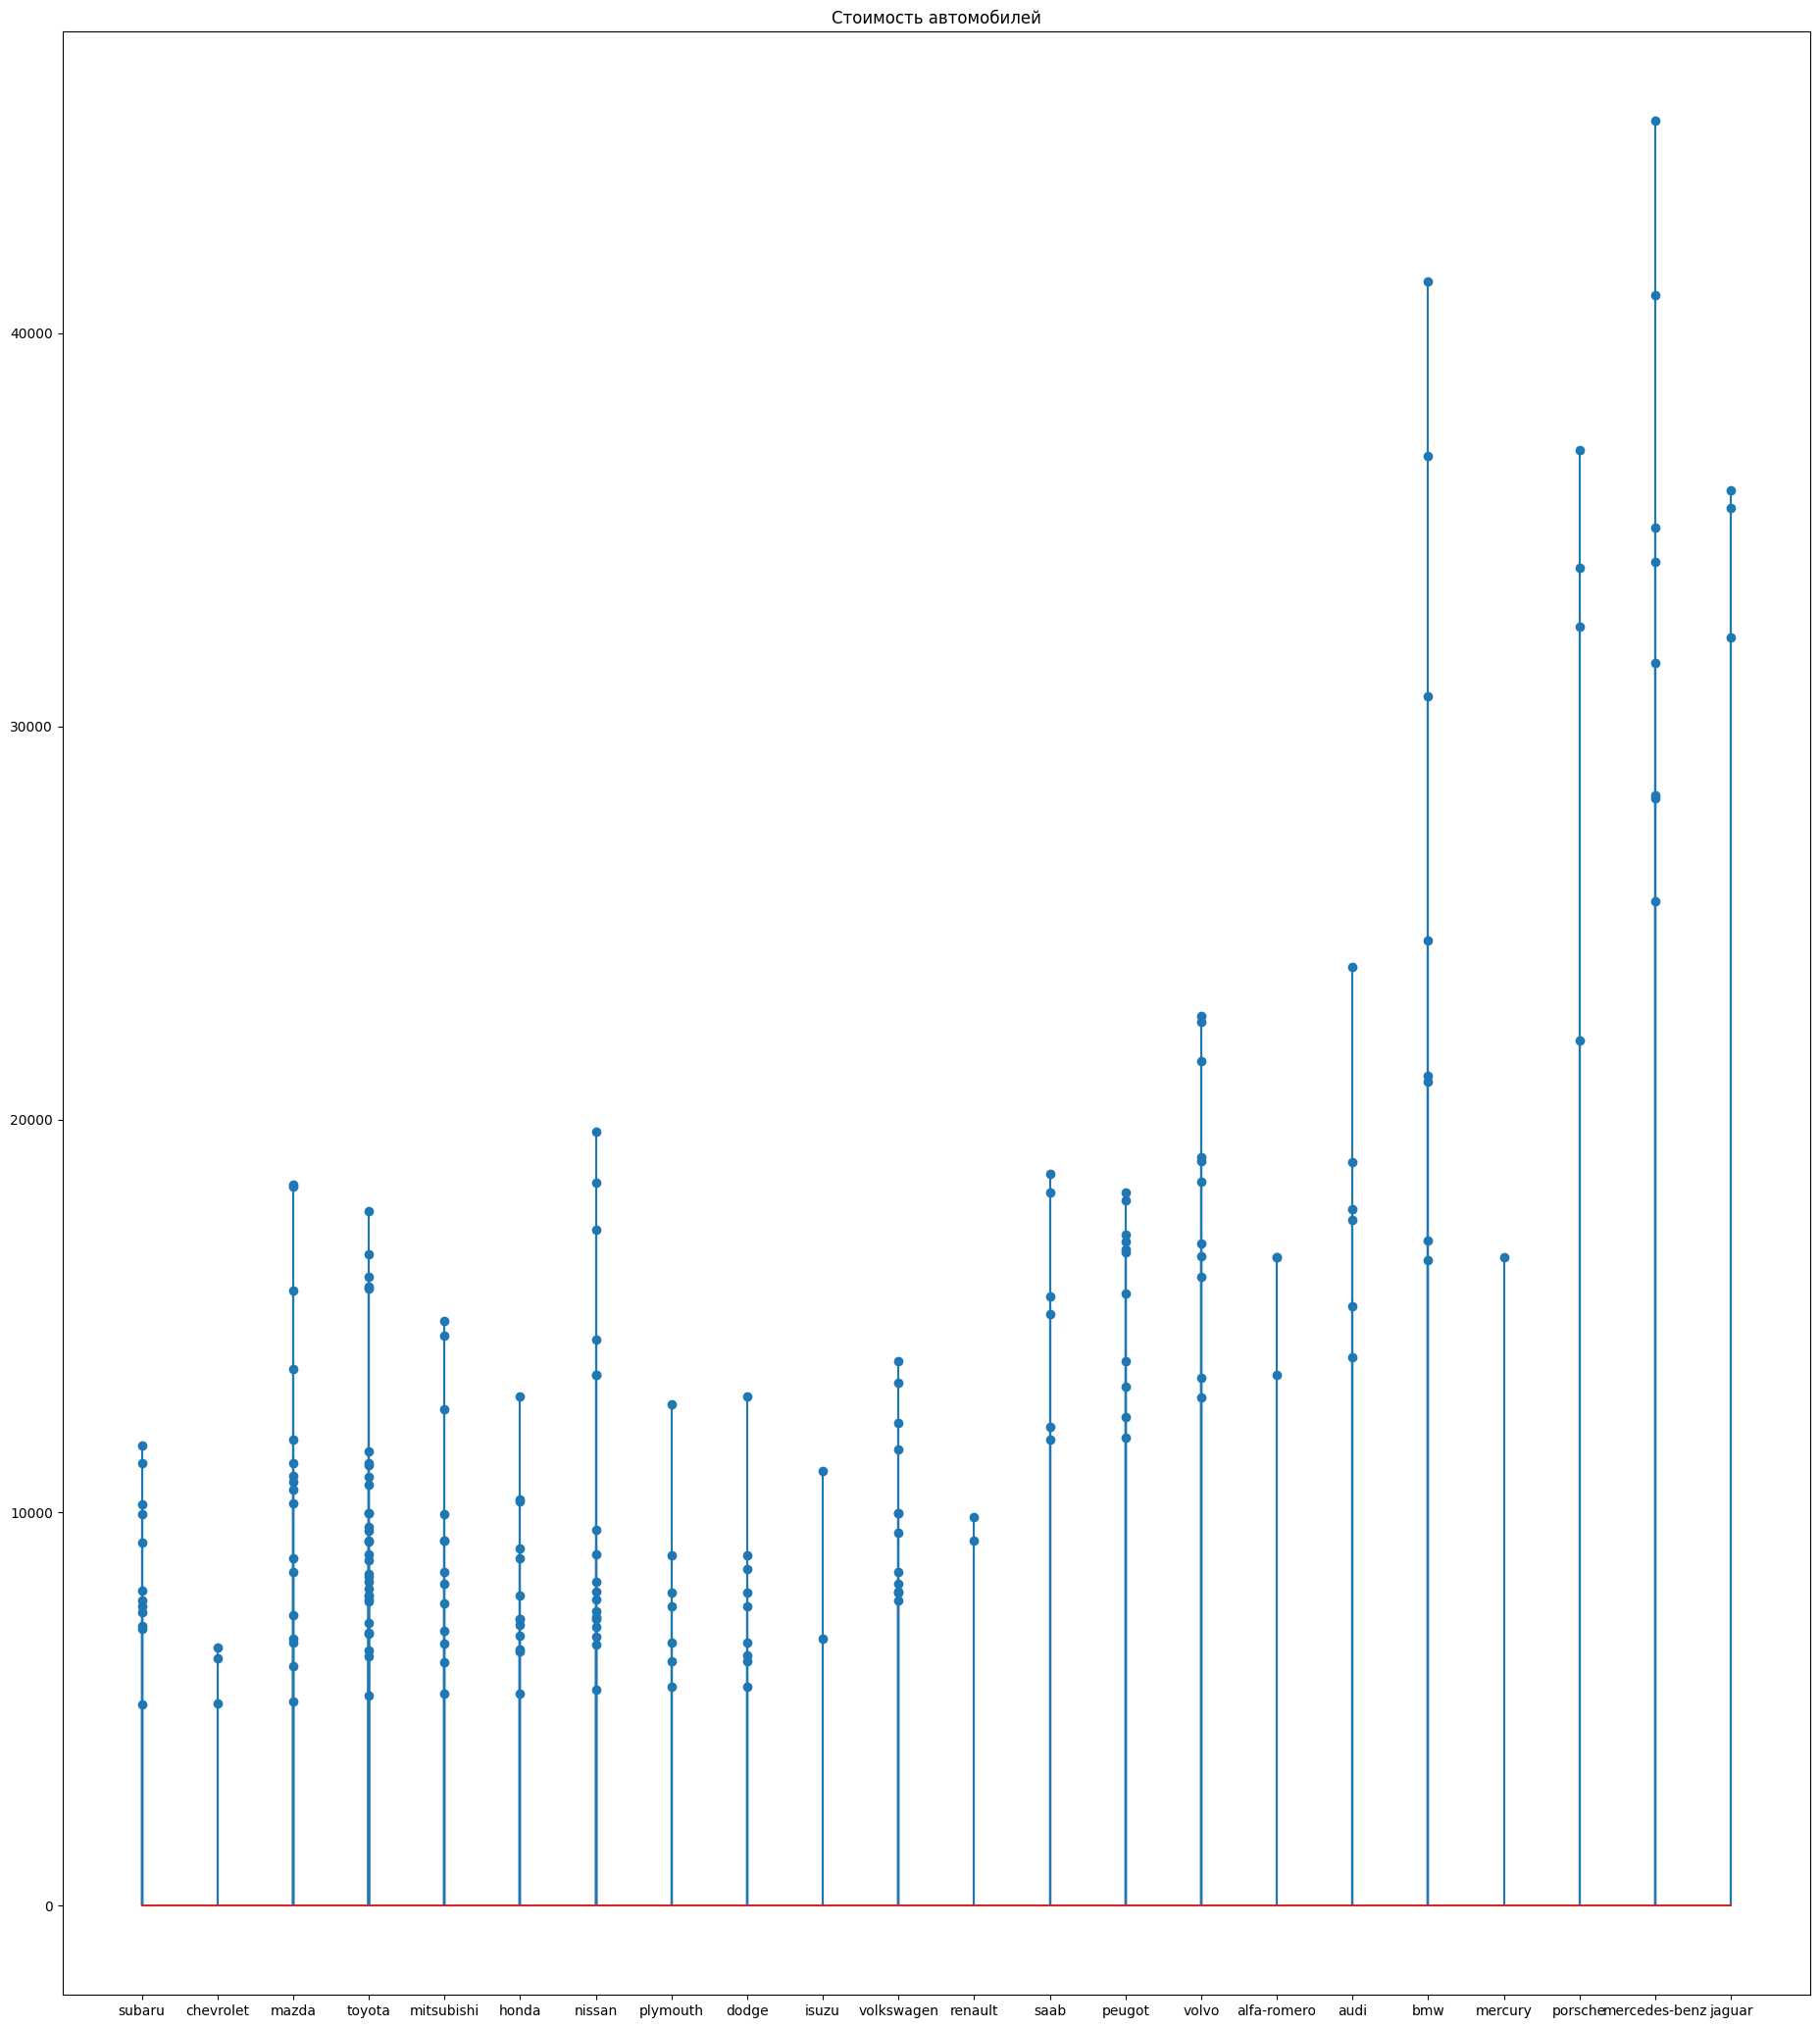

In [42]:
fig = plt.figure(figsize=(23, 26))
df_price = df_price.sort_values(by='Стоимость', ascending = True, ignore_index=True)
ax = fig.add_subplot()
plt.title('Стоимость автомобилей')
line2 = ax.stem(df_price['Марка'], df_price['Стоимость'])
df = df_price.sort_values('Стоимость', ascending = False)


In [43]:
df.tail(5) #самые дешевые машины

,Марка,Стоимость
4,mitsubishi,5389.0
3,toyota,5348.0
2,mazda,5195.0
1,chevrolet,5151.0
0,subaru,5118.0


In [44]:
df.head(5) #самые дорогие машины

,Марка,Стоимость
200,mercedes-benz,45400.0
199,bmw,41315.0
198,mercedes-benz,40960.0
197,porsche,37028.0
196,bmw,36880.0


По данной диаграмме и двум таблицам можно сказать, что самые дорогие автомобили, это автомобили марок BMW, Porsche и Mercedes-benz, т.к даже в 80-е немецкие автомобили считались премиальными и стоили соответственно. Самые дешевые автомобили, это автомобили марок Mitsubishi, Toyota, Mazda, Chevrolet и Subaru, т.к японцы всегда производили массовые и не дорогие автомобили, а Chevrolet - это марка внутреннего рынка Америке.

### Расход топлива

In [45]:
dict = {'Марка':[],
        'Расход по трассе':[],
        'Расход по городу':[],
        'Средний расход':[]
       }
  
df = pd.DataFrame(dict)
for i in range(len(data)):
    make = data['make'].loc[data.index[i]] 
    city_mpg = data['city-mpg'].loc[data.index[i]]
    highway_mpg = data['highway-mpg'].loc[data.index[i]]
    sr_mpg = (data['highway-mpg'].loc[data.index[i]] + data['city-mpg'].loc[data.index[i]]) / 2
    df2 = {'Марка': make, 'Расход по трассе': highway_mpg, 'Расход по городу': city_mpg, 'Средний расход': sr_mpg}
    df = pd.concat([df, pd.DataFrame([df2])], ignore_index=True)
display(df)

,Марка,Расход по трассе,Расход по городу,Средний расход
0,alfa-romero,27.0,21.0,24.0
1,alfa-romero,27.0,21.0,24.0
2,alfa-romero,26.0,19.0,22.5
3,audi,30.0,24.0,27.0
4,audi,22.0,18.0,20.0
...,...,...,...,...
200,volvo,28.0,23.0,25.5
201,volvo,25.0,19.0,22.0
202,volvo,23.0,18.0,20.5
203,volvo,27.0,26.0,26.5


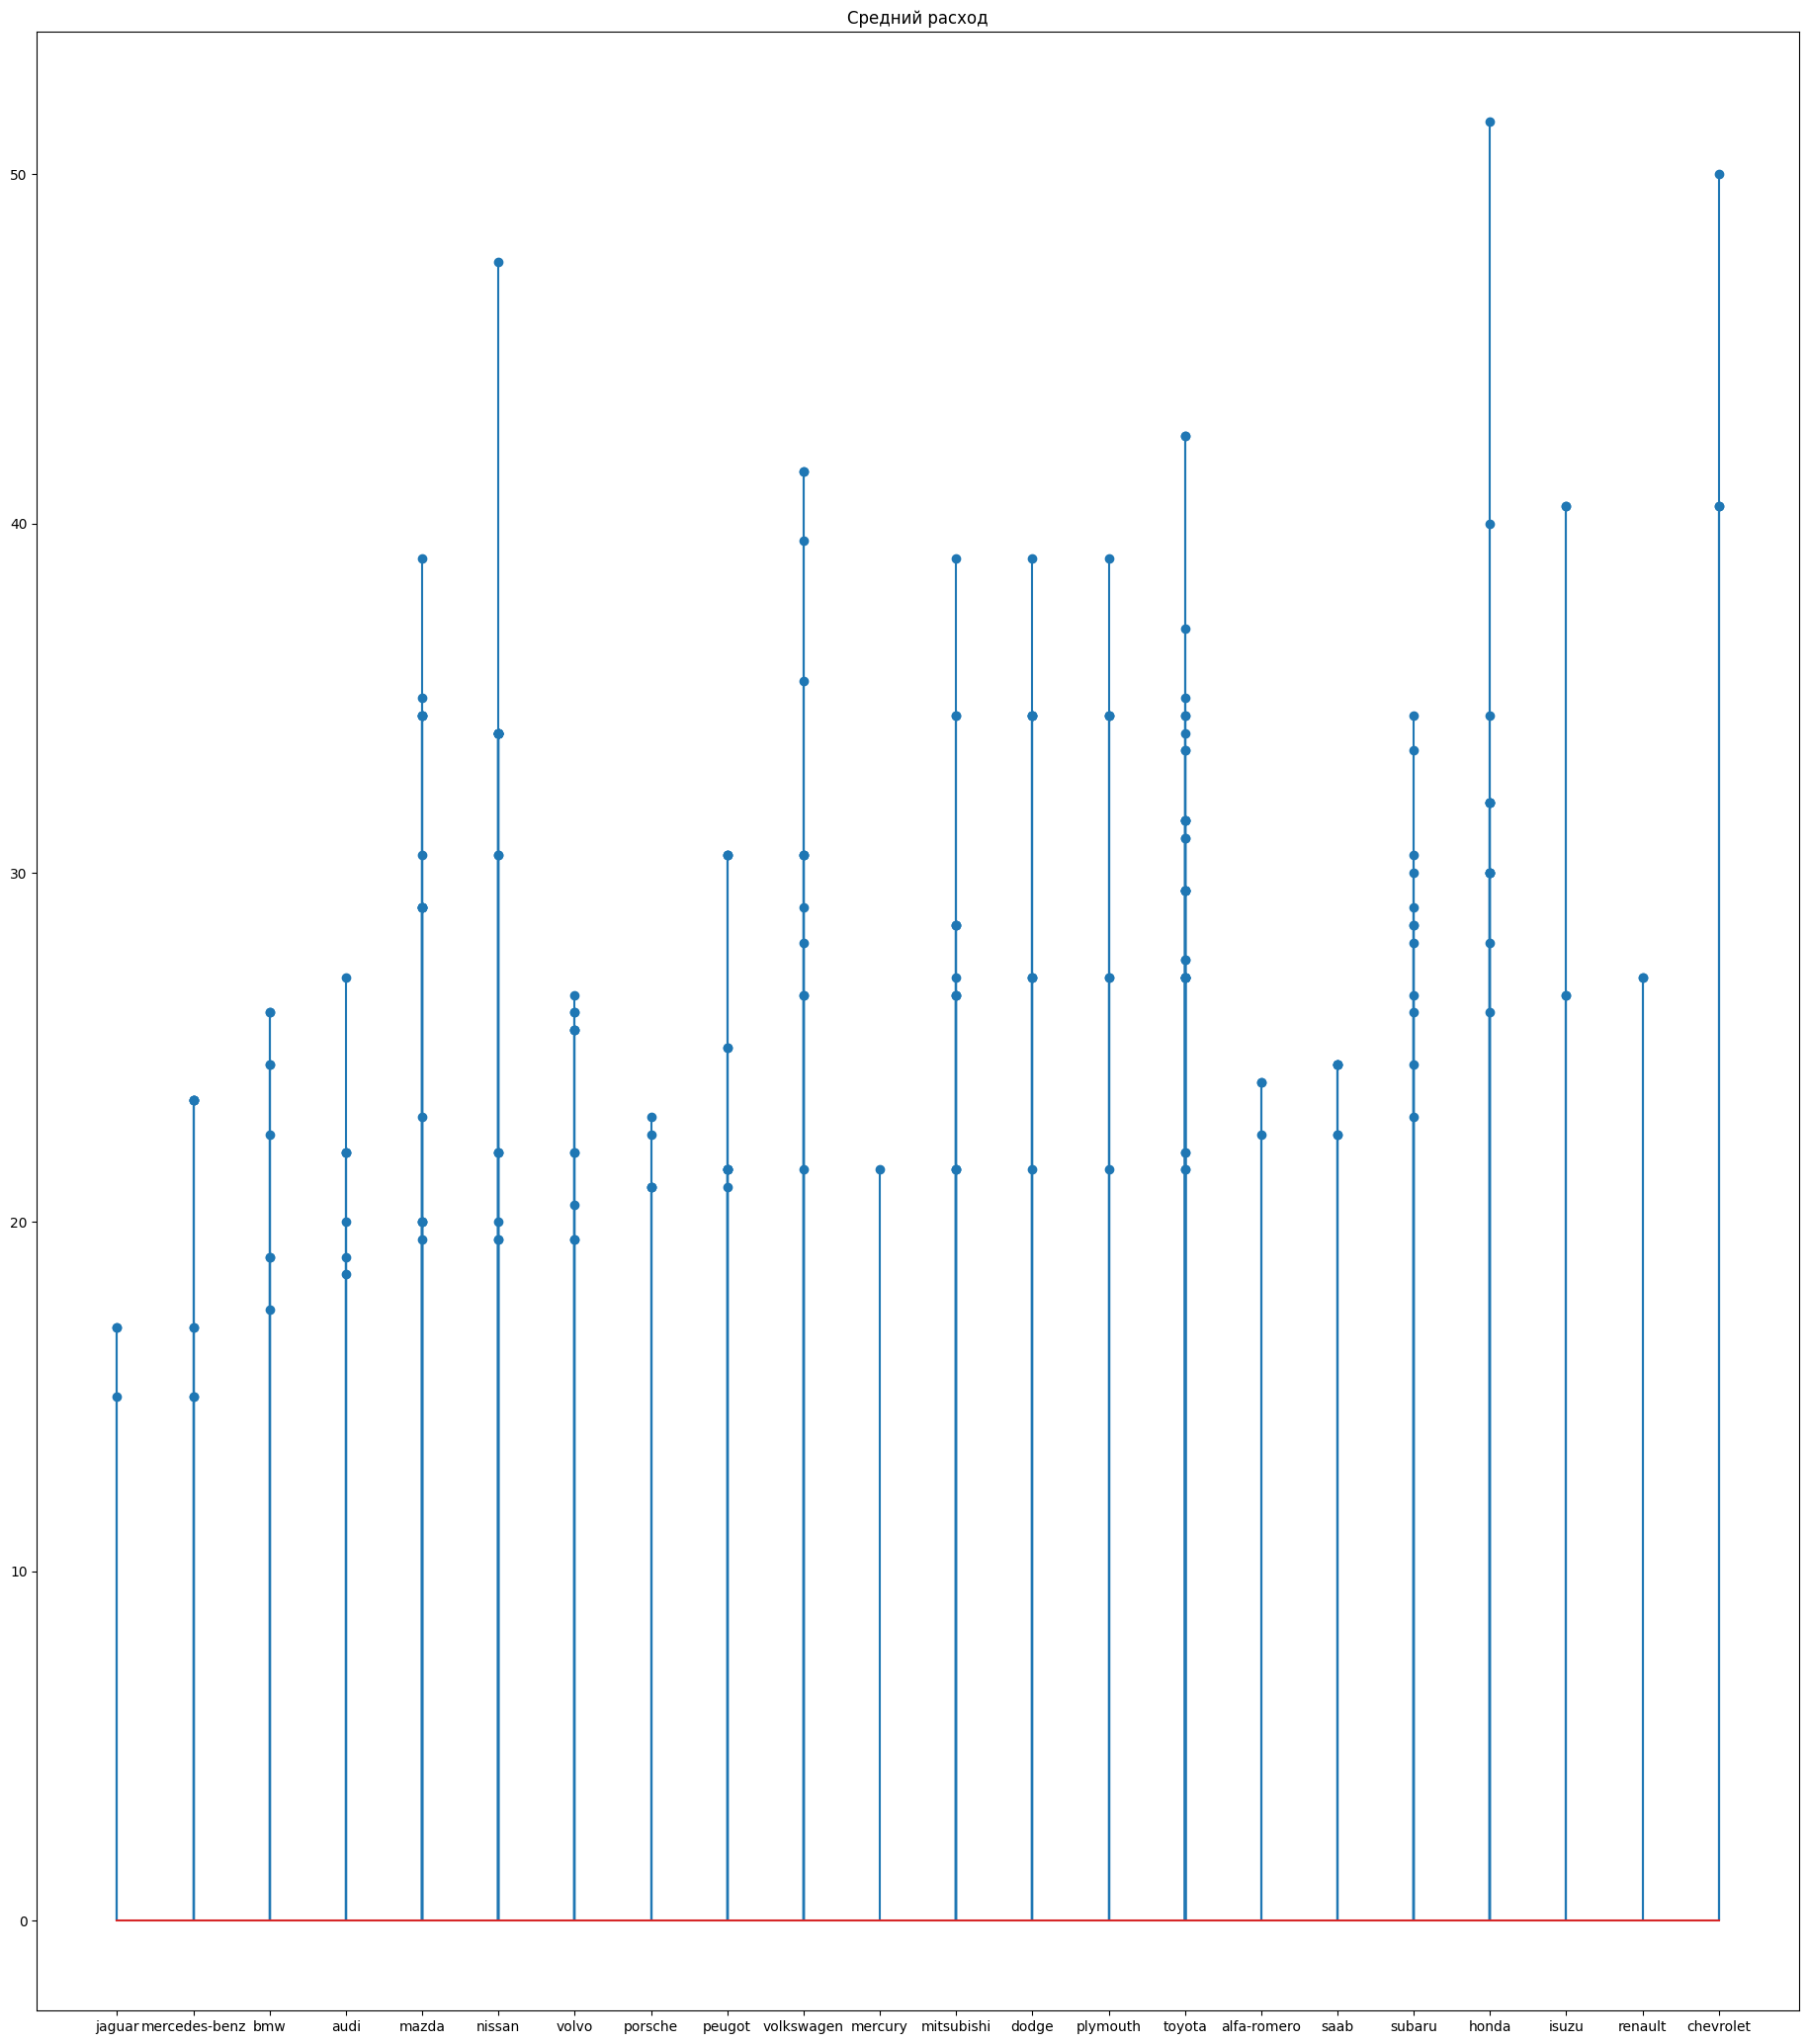

In [46]:
fig = plt.figure(figsize=(23, 26))
df = df.sort_values(by='Средний расход', ascending = True, ignore_index=True)
ax = fig.add_subplot()
plt.title('Средний расход')
line2 = ax.stem(df['Марка'], df['Средний расход'])

In [47]:
df.tail(1) # автомобиль с максимальным расходом

,Марка,Расход по трассе,Расход по городу,Средний расход
204,honda,54.0,49.0,51.5


Самый большой расход топлива наблюдается у автомобиля марки Honda. Это связанно с тем, что в те года на автомобили это марки ставили 4-ех цилинтровые, рыдные движки, которые имели болезнь тратить большое кол-во бензина.

In [48]:
df.head(1) # автомобиль с минимальных

,Марка,Расход по трассе,Расход по городу,Средний расход
0,jaguar,17.0,13.0,15.0


Самый маленьки расход имеет автомобиль марки Jaguar.

## Сравнение средней стоимости современных автомобилей и автомобилей 1985 года

Для этого был взят еще один датасет (https://www.kaggle.com/datasets/chancev/carsforsale?resource=download)

In [49]:
path = "/home/dima/Myproject/DSIS_summer/archive_2"
data2 = pd.read_csv('/home/dima/Myproject/DSIS_summer/archive_2/cars_raw.csv')
filenames = glob.glob(path + "/*.csv")
dfs2 = []
for _ in filenames:
    dfs2.append(pd.read_csv(_))
data2 = pd.concat(dfs2, ignore_index=True)
data2.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [53]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

dict = {'Марка':[],
        'Стоимость':[]
       }
  
df2 = pd.DataFrame(dict)
for i in range(len(data2)):
    make = data2['Make'].loc[data2.index[i]].lower()
    price = data2['Price'].loc[data2.index[i]]
    if price != 'Not Priced':
        df3 = {'Марка': make, 'Стоимость': int(locale.atoi(price[1:]))}
        df2 = pd.concat([df2, pd.DataFrame([df3])], ignore_index=True)
display(df2)
display(df_price)

,Марка,Стоимость
0,toyota,39998.0
1,ford,49985.0
2,ram,41860.0
3,honda,28500.0
4,lexus,49000.0
...,...,...
9369,subaru,27374.0
9370,audi,61998.0
9371,buick,26944.0
9372,subaru,28568.0


,Марка,Стоимость
0,subaru,5118.0
1,chevrolet,5151.0
2,mazda,5195.0
3,toyota,5348.0
4,mitsubishi,5389.0
...,...,...
196,bmw,36880.0
197,porsche,37028.0
198,mercedes-benz,40960.0
199,bmw,41315.0


Построил 2 таблички с моделями разных марок и их стоимостью

In [102]:
df_price = df_price.groupby("Марка").mean()
df_price = df_price.rename(columns = {'Стоимость' : 'Стоимость 1985'})
df_price = df_price.rename({'alfa-romero' : 'alfa'})
display(df_price)


,Стоимость 1985
Марка,
alfa,15498.333333
audi,17859.166667
bmw,26118.750000
chevrolet,6007.000000
dodge,7875.444444
honda,8184.692308
isuzu,8916.500000
jaguar,34600.000000
mazda,10652.882353


In [103]:
df2 = df2.rename(columns = {'Стоимость' : 'Стоимость 2000+'})
df2 = df2.groupby("Марка").mean()
display(df2)

,Стоимость 2000+
Марка,
acura,35599.082251
alfa,34577.500000
audi,46193.441038
bentley,146911.833333
bmw,44383.168611
buick,27255.438596
cadillac,41564.702341
chevrolet,36703.641827
chrysler,26221.923077


Преобразовал таблички, теперь в них содержится марка и средняя стоимость модели данной марки

In [138]:
result = pd.concat([df_price, df2], axis=1, join='inner')
display(result)

,Стоимость 1985,Стоимость 2000+
Марка,,
alfa,15498.333333,34577.500000
audi,17859.166667,46193.441038
bmw,26118.750000,44383.168611
chevrolet,6007.000000,36703.641827
dodge,7875.444444,38196.931034
honda,8184.692308,31642.295775
jaguar,34600.000000,44324.233333
mazda,10652.882353,28565.156098
mercedes-benz,33647.000000,47198.471605


Объединил таблички

Text(0.5, 0, 'Марки авто')

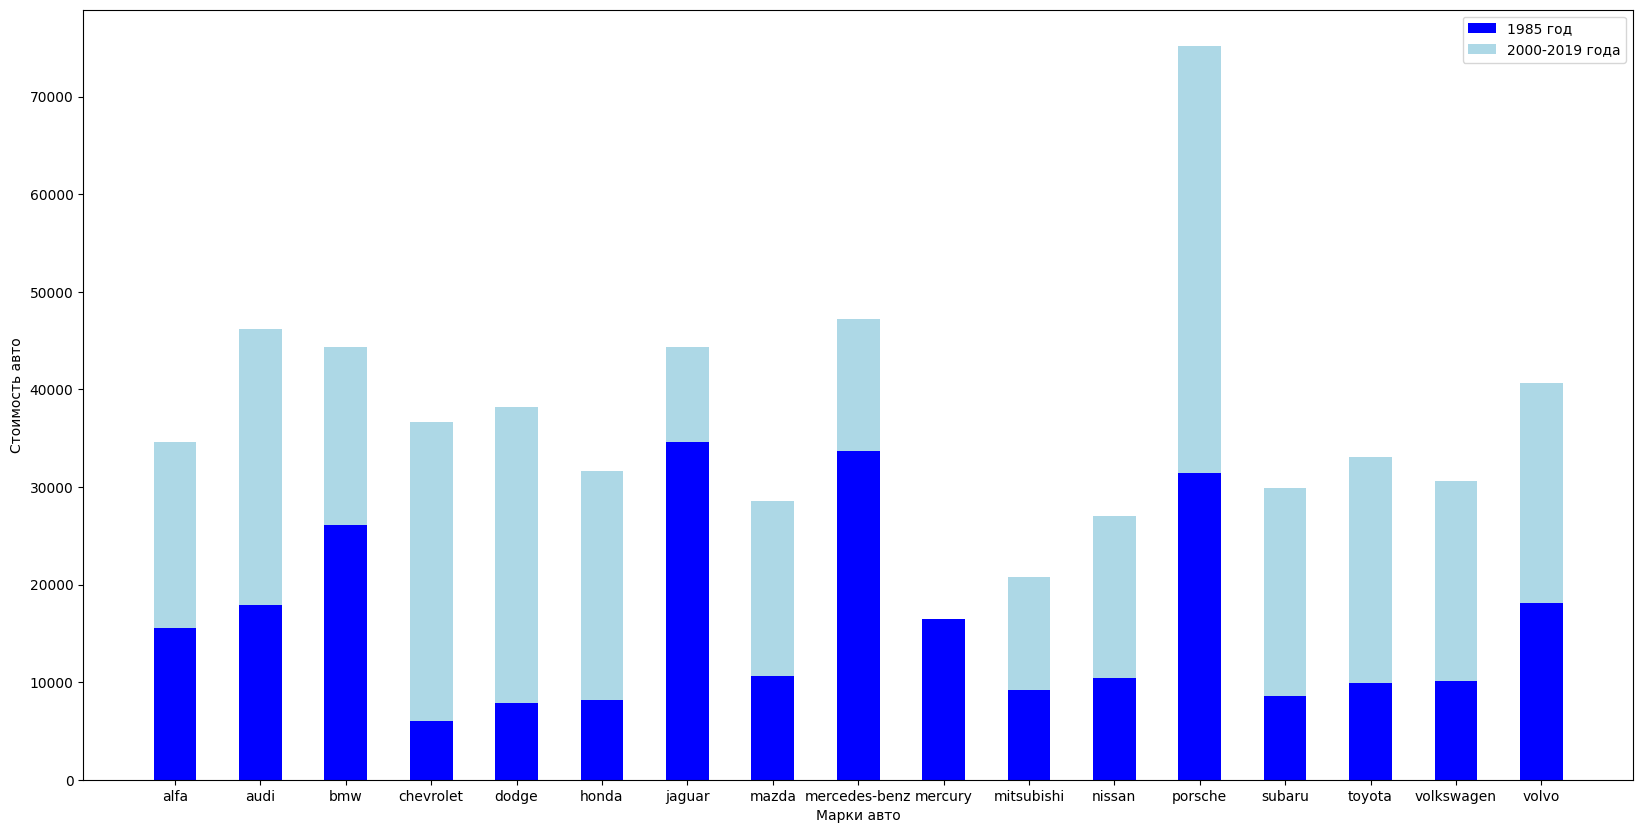

In [137]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
d = list(result.index)
rect2 = plt.bar(d, 'Стоимость 2000+', width=0.5, color='lightblue', data=result)
rect1 = plt.bar(d, 'Стоимость 1985', width=0.5, color='blue', data=result)




plt.legend((rect1[0], rect2[0]), ('1985 год', '2000-2019 года'))


ax.set_ylabel('Стоимость авто')
ax.set_xlabel('Марки авто')